In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics.pairwise import cosine_distances,euclidean_distances
from sklearn.metrics import pairwise_distances,make_scorer,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt


# question 1

1. Preprocess, clean and prepare the dataset based on the previous lab experience. Separate features and
labels as X and Y respectively

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
dataset = dataset.drop(["Unnamed: 0","id"],axis = 1)

In [ ]:
dataset.iloc[0]

Gender                                                  Male
Customer Type                                 Loyal Customer
Age                                                       13
Type of Travel                               Personal Travel
Class                                               Eco Plus
Flight Distance                                          460
Inflight wifi service                                      3
Departure/Arrival time convenient                          4
Ease of Online booking                                     3
Gate location                                              1
Food and drink                                             5
Online boarding                                            3
Seat comfort                                               5
Inflight entertainment                                     5
On-board service                                           4
Leg room service                                           3
Baggage handling        

In [ ]:
np.sum(pd.isnull(dataset))

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
dataset["Arrival Delay in Minutes"].fillna(dataset["Arrival Delay in Minutes"].mean(),inplace = True)

In [ ]:
np.sum(pd.isnull(dataset))

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
catl_fec = np.array([0,1,3,4,-1])
catl_data = dataset.iloc[:,catl_fec]

In [ ]:
catl_data

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [ ]:
before = {}
after = {}
for feature in catl_data.columns:
  feature_class = np.unique(dataset[feature])
  k = len(feature_class)
  before[feature] = feature_class
  after[feature] = range(k)
  dataset[feature].replace(feature_class,range(k),inplace = True)

In [ ]:
before

{'Gender': array(['Female', 'Male'], dtype=object),
 'Customer Type': array(['Loyal Customer', 'disloyal Customer'], dtype=object),
 'Type of Travel': array(['Business travel', 'Personal Travel'], dtype=object),
 'Class': array(['Business', 'Eco', 'Eco Plus'], dtype=object),
 'satisfaction': array(['neutral or dissatisfied', 'satisfied'], dtype=object)}

In [ ]:
after

{'Gender': range(0, 2),
 'Customer Type': range(0, 2),
 'Type of Travel': range(0, 2),
 'Class': range(0, 3),
 'satisfaction': range(0, 2)}

In [ ]:
dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [ ]:
dataset.mean()

Gender                                  0.492541
Customer Type                           0.182678
Age                                    39.379706
Type of Travel                          0.310373
Class                                   0.594135
Flight Distance                      1189.448375
Inflight wifi service                   2.729683
Departure/Arrival time convenient       3.060296
Ease of Online booking                  2.756901
Gate location                           2.976883
Food and drink                          3.202129
Online boarding                         3.250375
Seat comfort                            3.439396
Inflight entertainment                  3.358158
On-board service                        3.382363
Leg room service                        3.351055
Baggage handling                        3.631833
Checkin service                         3.304290
Inflight service                        3.640428
Cleanliness                             3.286351
Departure Delay in M

In [ ]:
dataset.std()

Gender                                 0.499947
Customer Type                          0.386404
Age                                   15.114964
Type of Travel                         0.462649
Class                                  0.620799
Flight Distance                      997.147281
Inflight wifi service                  1.327829
Departure/Arrival time convenient      1.525075
Ease of Online booking                 1.398929
Gate location                          1.277621
Food and drink                         1.329533
Online boarding                        1.349509
Seat comfort                           1.319088
Inflight entertainment                 1.332991
On-board service                       1.288354
Leg room service                       1.315605
Baggage handling                       1.180903
Checkin service                        1.265396
Inflight service                       1.175663
Cleanliness                            1.312273
Departure Delay in Minutes            38

In [ ]:
Y = dataset["satisfaction"]
X = dataset.drop(["satisfaction"],axis = 1)

2. Create an object of SFS by embedding the Decision Tree classifier object, providing 10 features,
forward as True, floating as False and scoring = accuracy. Train SFS and report accuracy for all 10
features. Also, list the names of the 10 best features selected by SFS.

In [ ]:
sfs = SFS(DecisionTreeClassifier(),k_features=10,forward=True,floating=False,scoring='accuracy')
sfs = sfs.fit(X,Y)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
sfs.k_feature_names_

In [ ]:
sfs.k_score_

3. Using the forward and Floating parameter toggle between SFS(forward True, floating False), SBS
(forward False, floating False), SFFS (forward True, floating True), SBFS (forward False, floating True),
and choose cross validation = 4 for each configuration. Also, report cv scores for each configuration.

In [ ]:
sfs1 = SFS(DecisionTreeClassifier(),k_features=10,forward=True,floating=False,scoring='accuracy',cv = 4)
sfs2 = SFS(DecisionTreeClassifier(),k_features=10,forward=False,floating=False,scoring='accuracy',cv = 4)
sfs3 = SFS(DecisionTreeClassifier(),k_features=10,forward=True,floating=True,scoring='accuracy',cv = 4)
sfs4 = SFS(DecisionTreeClassifier(),k_features=10,forward=False,floating=True,scoring='accuracy',cv = 4)
sfs1 = sfs1.fit(X,Y)
sfs2 = sfs2.fit(X,Y)
sfs3 = sfs3.fit(X,Y)
sfs4 = sfs4.fit(X,Y)

In [ ]:
print(f"Accuracy for sfs1 : {sfs1.k_score_}")
print(f"Accuracy for sfs2 : {sfs2.k_score_}")
print(f"Accuracy for sfs3 : {sfs3.k_score_}")
print(f"Accuracy for sfs4 : {sfs4.k_score_}")


Accuracy for sfs1 : None
Accuracy for sfs2 : None
Accuracy for sfs3 : None
Accuracy for sfs4 : None


4. Visualize the output from the feature selection in a pandas DataFrame format using the get_metric_dict
for all four configurations. Finally, plot the results for each configuration (from mlxtend. plotting import
plot_sequential_feature_selection as plot_sfs)

In [ ]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

In [ ]:
plot_sfs(sfs1.get_metric_dict())

In [ ]:
pd.DataFrame.from_dict(sfs2.get_metric_dict()).T

In [ ]:
plot_sfs(sfs2.get_metric_dict())

In [ ]:
pd.DataFrame.from_dict(sfs3.get_metric_dict()).T

In [ ]:
plot_sfs(sfs3.get_metric_dict())

In [ ]:
pd.DataFrame.from_dict(sfs4.get_metric_dict()).T

In [ ]:
plot_sfs(sfs4.get_metric_dict())

In [ ]:
euclidean_distances([[1,1]],[[2,2]])

In [ ]:
def information_gain(Y,pred_Y):
  classes,cls_num = np.unique(Y,return_counts = True)
  total_num = np.sum(cls_num)
  info = 0
  for i in range(len(cls_num)):
    p = cls_num[i]/total_num
    info += -p*np.log(p)
  cls_pred_Y,cls_pred_num = np.unique(pred_Y,return_counts = True)
  for i in range(len(cls_pred_Y)):
    iter_Y = Y[pred_Y == cls_pred_Y[i]]
    iter_classes,iter_cls_num = np.unique(iter_Y,return_counts = True)
    iter_total_num = np.sum(iter_cls_num)
    ent = 0
    for j in range(len(iter_cls_num)):
      p = iter_cls_num[j]/iter_total_num
      ent += -p*np.log(p)
    q = cls_pred_num[i]/total_num
    info -= q*ent
  return info

def angular_separation(X,Y):
  X = X.values
  Y = Y.values
  cls = np.unique(Y)
  n = len(cls)
  angle = 0
  k = 0
  for i in range(n):
    for j in range(i+1,n):
      ang = cosine_distances(X[Y==cls[i],:],X[Y==cls[j],:])
      angle += np.sum(ang)
      p,q = ang.shape
      k += p*q
  return angle/k



def euclidiab_dist(X,Y):
  X = X.values
  Y = Y.values
  cls = np.unique(Y)
  n = len(cls)
  euc_dist = 0
  k = 0
  for i in range(n):
    for j in range(i+1,n):
      euc = euclidean_distances(X[Y==cls[i],:],X[Y==cls[j],:])
      euc_dist += np.sum(euc)
      p,q = euc.shape
      k += p*q
  return euc_dist/k

def city_block(X,Y):
  X = X.values
  Y = Y.values
  cls = np.unique(Y)
  n = len(cls)
  dist = 0
  k = 0
  for i in range(n):
    for j in range(i+1,n):
      cb = pairwise_distances(X[Y==cls[i],:],X[Y==cls[j],:],metric = 'cityblock')
      dist += np.sum(cb)
      p,q = cb.shape
      k += p*q
  return dist/k


class BDFSG:
  def __init__(self,n_features=-1,criterion = 'accuracy'):
    self.n_feature = n_features
    if criterion == 'accuracy':
      def accuracy(X,Y):
        return np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,scoring = 'accuracy'))
      self.scoring_fn = accuracy
    elif criterion == 'information_gain':
      def info(X,Y):
        return np.mean(cross_val_score(SVC(),X,Y,scoring = make_scorer(information_gain)))
      self.scoring_fn = info
    elif criterion == 'angular':
      self.scoring_fn = angular_separation
    elif criterion == 'euclidian':
      self.scoring_fn = euclidiab_dist
    elif criterion == 'cityblock':
      self.scoring_fn = city_block

  def fit(self,X,Y):
    X = pd.DataFrame(X)
    feature_backward = X.columns
    feature_forward = np.array([],dtype = feature_backward.dtype)
    while(True):
      max_score = 0
      best_iteration_feature = None
      for i in feature_backward:
        if i not in feature_forward:
          score = self.scoring_fn(X[np.append(feature_forward,i)],Y)
          if score > max_score:
            max_score = score
            best_iteration_feature = i
      feature_forward = np.append(feature_forward,best_iteration_feature)
      if len(feature_forward) == self.n_feature:
        feature_set = feature_forward
        break
      if len(feature_forward) == len(feature_backward):
        feature_set = feature_forward
        break
      max_score = 0
      worst_iteration_feature = None
      for i in feature_backward:
        if i not in feature_forward:
          score = self.scoring_fn(X.drop(i,axis = 1),Y)
          if score > max_score:
            max_score = score
            worst_iteration_feature = i
      feature_backward = np.delete(feature_backward,feature_backward == worst_iteration_feature)
      if len(feature_backward) == self.n_feature:
        feature_set = feature_backward
        break
      if len(feature_forward) == len(feature_backward):
        feature_set = feature_forward
        break
    self.feature_set = feature_set

  def transform(self,X):
    X = pd.DataFrame(X)
    return X[self.feature_set]



In [ ]:

bdfsg_acc = BDFSG(n_features = 10,criterion = 'accuracy')
bdfsg_info = BDFSG(n_features = 10,criterion = 'information_gain')
bdfsg_ang = BDFSG(n_features = 10,criterion = 'angular')
bdfsg_euc = BDFSG(n_features = 10,criterion = 'euclidian')
bdfsg_cb = BDFSG(n_features = 10,criterion = 'cityblock')


In [ ]:
X_ = X.sample(frac = 0.25,)

In [ ]:
Y_ = Y.iloc[X_.index]

In [ ]:
bdfsg_acc.fit(X_,Y_)
bdfsg_info.fit(X_,Y_)
bdfsg_ang.fit(X_,Y_)
bdfsg_euc.fit(X_,Y_)
bdfsg_cb.fit(X_,Y_)

X_acc = bdfsg_acc.transform(X)
X_info = bdfsg_info.transform(X)
X_ang = bdfsg_ang.transform(X)
X_euc = bdfsg_euc.transform(X)
X_cb = bdfsg_cb.transform(X)

In [ ]:
X_acc = pd.read_csv("/content/drive/MyDrive/X_acc.csv")
X_info = pd.read_csv("/content/drive/MyDrive/X_info.csv")
X_ang = pd.read_csv("/content/drive/MyDrive/X_ang.csv")
X_euc = pd.read_csv("/content/drive/MyDrive/X_euc.csv")
X_cb = pd.read_csv("/content/drive/MyDrive/X_cb.csv")


In [ ]:
train_X_acc,test_X_acc,train_Y,test_Y = train_test_split(X_acc,Y,test_size=0.3,random_state = 12345)
train_X_info,test_X_info,train_Y,test_Y = train_test_split(X_info,Y,test_size=0.3,random_state = 12345)
train_X_ang,test_X_ang,train_Y,test_Y = train_test_split(X_ang,Y,test_size=0.3,random_state = 12345)
train_X_euc,test_X_euc,train_Y,test_Y = train_test_split(X_euc,Y,test_size=0.3,random_state = 12345)
train_X_cb,test_X_cb,train_Y,test_Y = train_test_split(X_cb,Y,test_size=0.3,random_state = 12345)


In [ ]:
clk_acc = KNeighborsClassifier(n_neighbors=3).fit(train_X_acc,train_Y)
clk_info = KNeighborsClassifier(n_neighbors=3).fit(train_X_info,train_Y)
clk_ang = KNeighborsClassifier(n_neighbors=3).fit(train_X_ang,train_Y)
clk_euc = KNeighborsClassifier(n_neighbors=3).fit(train_X_euc,train_Y)
clk_cb = KNeighborsClassifier(n_neighbors=3).fit(train_X_cb,train_Y)


In [ ]:
pred_Y_acc = clk_acc.predict(test_X_acc)
pred_Y_info = clk_info.predict(test_X_info)
pred_Y_ang = clk_ang.predict(test_X_ang)
pred_Y_euc = clk_euc.predict(test_X_euc)
pred_Y_cb = clk_cb.predict(test_X_cb)


In [ ]:
print(f"Accuracy with criteria as accuracy : {accuracy_score(test_Y,pred_Y_acc):.4f}")
print(f"Accuracy with criteria as information gain : {accuracy_score(test_Y,pred_Y_info):.4f}")
print(f"Accuracy with criteria as angular separation : {accuracy_score(test_Y,pred_Y_ang):.4f}")
print(f"Accuracy with criteria as euclidean : {accuracy_score(test_Y,pred_Y_euc):.4f}")
print(f"Accuracy with criteria as city-block : {accuracy_score(test_Y,pred_Y_cb):.4f}")


Accuracy with criteria as accuracy : 0.6182
Accuracy with criteria as information gain : 0.6202
Accuracy with criteria as angular separation : 0.5510
Accuracy with criteria as euclidean : 0.5814
Accuracy with criteria as city-block : 0.5814


# Question 2

In [ ]:
sigma = np.array([[0.6006771,0.14889879,0.244939],[0.14889879,0.58982531,0.24154981],[0.244939,0.24154981,0.48778655]])

In [ ]:
sigma

array([[0.6006771 , 0.14889879, 0.244939  ],
       [0.14889879, 0.58982531, 0.24154981],
       [0.244939  , 0.24154981, 0.48778655]])

In [ ]:
mu = np.zeros((3,))
mu

array([0., 0., 0.])

In [ ]:
X = np.random.multivariate_normal(mu,sigma,1000)

In [ ]:
v = np.array([1/6**0.5,1/6**0.5,-2/6**0.5])

In [ ]:
Y = (v@X.T <= 0)*1

In [ ]:
dataset = pd.DataFrame(X,columns = ["X1","X2","X3"])
dataset["Y"] = Y

In [ ]:
dataset

,X1,X2,X3,Y
0,0.264636,0.461606,0.156718,0
1,0.805795,-1.061310,0.132311,1
2,-0.813641,-0.219060,0.192405,1
3,-1.835787,-0.707140,-0.874101,1
4,-0.229735,1.289840,0.338264,0
...,...,...,...,...
995,-0.616368,-0.557822,-0.866573,0
996,-0.444604,-0.050217,-0.355576,0
997,-0.673882,-0.922332,-0.035493,1
998,0.553484,1.384050,0.879722,0


In [ ]:
fig = px.scatter_3d(dataset,x="X1",y = "X2",z = "X3",color = "Y")
fig.show()

In [ ]:
pca = PCA(n_components=3)
pca = pca.fit(X)
Xp = pca.transform(X)

In [ ]:
dataset_p = pd.DataFrame(Xp,columns = ["X1","X2","X3"])
dataset_p["Y"] = Y

In [ ]:
fig = px.scatter_3d(dataset_p,x="X1",y = "X2",z = "X3",color = "Y")
fig.show()

feature 0 and 1


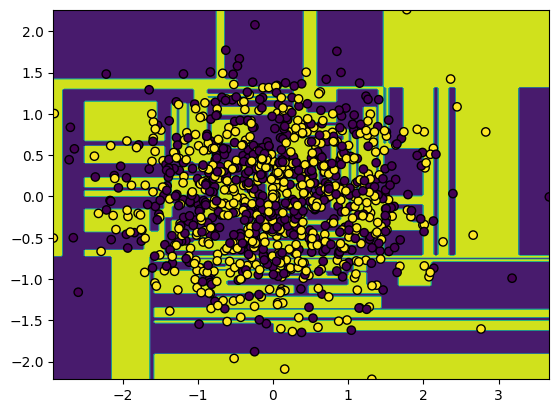

feature 0 and 2


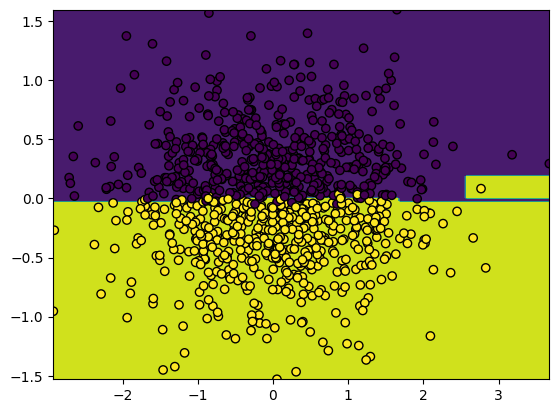

feature 1 and 2


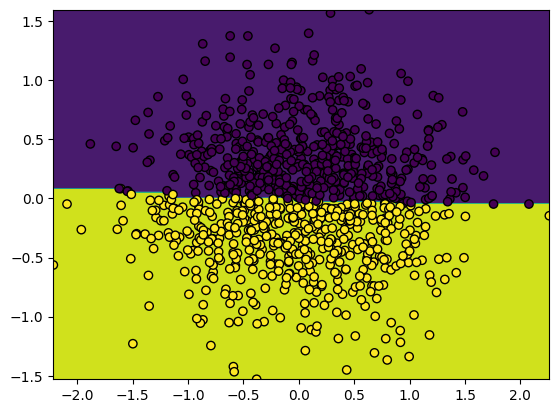

In [ ]:
for i in range(3):
  for j in range(i+1,3):
    print(f"feature {i} and {j}")
    clk = DecisionTreeClassifier()
    Xp_s = Xp[:,[i,j]]
    clk = clk.fit(Xp_s,Y)
    x1_min = np.min(Xp_s[:,0])
    x1_max = np.max(Xp_s[:,0])
    x2_min = np.min(Xp_s[:,1])
    x2_max = np.max(Xp_s[:,1])
    xx,yy = np.mgrid[x1_min:x1_max:200j,x2_min:x2_max:200j,]
    grid = np.vstack([xx.ravel(), yy.ravel()]).T
    pred_Y = np.reshape(clk.predict(grid),xx.shape)
    d = DecisionBoundaryDisplay(xx0 = xx,xx1 = yy,response = pred_Y)
    d.plot()
    d.ax_.scatter(Xp_s[:,0],Xp_s[:,1],c = Y,edgecolor = 'k')
    plt.show()

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(X)
Xp2 = pca.transform(X)

In [ ]:
clk = clk.fit(Xp2,Y)
x1_min = np.min(Xp2[:,0])
x1_max = np.max(Xp2[:,0])
x2_min = np.min(Xp2[:,1])
x2_max = np.max(Xp2[:,1])


In [ ]:
xx,yy = np.mgrid[x1_min:x1_max:200j,x2_min:x2_max:200j,]

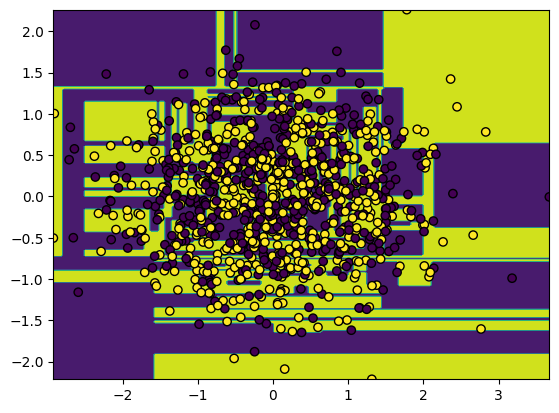

In [ ]:
grid = np.vstack([xx.ravel(), yy.ravel()]).T
pred_Y = np.reshape(clk.predict(grid),xx.shape)
d = DecisionBoundaryDisplay(xx0 = xx,xx1 = yy,response = pred_Y)
d.plot()
d.ax_.scatter(Xp2[:,0],Xp2[:,1],c = Y,edgecolor = 'k')
plt.show()